<a href="https://colab.research.google.com/github/NateOberdier/MetalFin/blob/main/4130_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Formatting

In [ ]:
import pandas as pd
import numpy as np
import random

random.seed(50)
np.random.seed(50)

HG_RANGES = {
    "very_low":  (0.001, 0.05),
    "low":       (0.02, 0.10),
    "medium":    (0.10, 0.30),
    "high":      (0.30, 0.70),
    "very_high": (0.70, 1.50),
}

LEAD_RANGES = {
    "very_low":  (0.0001, 0.003),
    "low":       (0.003, 0.010),
    "medium":    (0.010, 0.030),
    "high":      (0.030, 0.100),
}

ARSENIC_RANGES = {
    "very_low":  (0.005,  0.050),
    "low":       (0.050,  0.200),
    "medium":    (0.200,  0.500),
    "high":      (0.500,  1.500),
}

CADMIUM_RANGES = {
    "very_low":  (0.00001, 0.00020),
    "low":       (0.00020, 0.00100),
    "medium":    (0.00100, 0.00500),
    "high":      (0.00500, 0.05000),
}

def draw_from_range(ranges_dict, tier):
    lo, hi = ranges_dict[tier]
    return np.random.uniform(lo, hi)

species_data = [
    ("Atlantic Salmon", "marine", "carnivore", (60, 90),   (3000, 6000), "very_low", "very_low", "low",      "very_low"),
    ("Coho Salmon",     "marine", "carnivore", (55, 80),   (2500, 5000), "very_low", "very_low", "low",      "very_low"),
    ("Sockeye Salmon",  "marine", "carnivore", (50, 75),   (2000, 4000), "very_low", "very_low", "low",      "very_low"),
    ("Salmon (Generic)","marine", "carnivore", (50, 90),   (2000, 6000), "very_low", "very_low", "low",      "very_low"),
    ("Shrimp",          "marine", "omnivore",  (8, 20),    (10, 40),     "very_low", "low",      "medium",   "low"),
    ("Pollock",         "marine", "carnivore", (40, 90),   (1000, 5000), "very_low", "very_low", "low",      "very_low"),
    ("Tilapia",         "freshwater", "herbivore", (20, 45), (500, 1500),"very_low", "low",      "very_low", "very_low"),
    ("Catfish",         "freshwater", "omnivore", (25, 60), (800, 3000), "very_low", "low",      "very_low", "very_low"),
    ("Cod",             "marine", "carnivore", (50, 100),  (2000, 7000), "low",      "low",      "low",      "very_low"),
    ("Haddock",         "marine", "carnivore", (40, 75),   (1000, 3000), "low",      "low",      "low",      "very_low"),
    ("Whiting",         "marine", "carnivore", (30, 60),   (800, 2500),  "low",      "low",      "low",      "very_low"),
    ("Sardine",         "marine", "carnivore", (12, 25),   (50, 150),    "very_low", "low",      "medium",   "very_low"),
    ("Anchovy",         "marine", "carnivore", (8, 15),    (20, 50),     "very_low", "low",      "medium",   "very_low"),
    ("Herring",         "marine", "carnivore", (20, 35),   (100, 400),   "low",      "low",      "medium",   "very_low"),
    ("Mahi-Mahi",       "marine", "carnivore", (70, 120),  (4000, 15000),"medium",   "medium",   "low",      "low"),
    ("Albacore Tuna",   "marine", "carnivore", (80, 140),  (8000, 40000),"medium",   "medium",   "low",      "low"),
    ("Skipjack Tuna",   "marine", "carnivore", (60, 100),  (5000, 25000),"medium",   "medium",   "low",      "low"),
    ("Bluefish",        "marine", "carnivore", (40, 80),   (2000, 6000), "medium",   "medium",   "low",      "low"),
    ("Sea Bass",        "marine", "carnivore", (30, 80),   (1000, 7000), "medium",   "medium",   "low",      "low"),
    ("Snapper",         "marine", "carnivore", (30, 70),   (700, 3500),  "medium",   "medium",   "low",      "low"),
    ("Grouper",         "marine", "carnivore", (40, 100),  (1500, 10000),"high",     "medium",   "low",      "low"),
    ("Halibut",         "marine", "carnivore", (80, 200),  (20000, 60000),"medium",  "medium",   "low",      "low"),
    ("Trout",           "freshwater", "carnivore", (25, 60), (300, 2000),"low",      "low",      "very_low", "very_low"),
    ("Perch",           "freshwater", "carnivore", (15, 40), (200, 800), "low",      "low",      "very_low", "very_low"),
    ("Carp",            "freshwater", "omnivore",  (30, 70), (1000, 6000),"medium",  "medium",   "low",      "low"),
    ("Walleye",         "freshwater", "carnivore", (30, 80), (800, 4000),"medium",   "medium",   "low",      "low"),
    ("Pike",            "freshwater", "carnivore", (40, 120),(1500, 10000),"medium", "medium",   "low",      "low"),
    ("Bass (Freshwater)", "freshwater","carnivore",(25, 60),(500, 3500), "medium",   "medium",   "low",      "low"),
    ("Swordfish",       "marine", "carnivore", (100, 250), (20000, 50000),"very_high","medium","low","low"),
    ("Shark",           "marine", "carnivore", (150, 400), (30000, 200000),"very_high","medium","low","low"),
    ("King Mackerel",   "marine", "carnivore", (50, 120), (2000, 15000),"very_high", "medium","low","low"),
    ("Tilefish (Gulf)", "marine", "carnivore", (40, 80),  (1500, 7000), "very_high", "medium","low","low"),
    ("Orange Roughy",   "marine", "carnivore", (40, 75),  (1000, 5000), "high",      "medium","low","low"),
    ("Marlin",          "marine", "carnivore", (150, 300),(30000, 200000),"very_high","medium","low","low"),
    ("Bluefin Tuna",    "marine", "carnivore", (150, 250),(30000, 250000),"very_high","medium","low","low"),
    ("Bigeye Tuna",     "marine", "carnivore", (100, 200),(15000, 70000),"high",     "medium","low","low"),
    ("Yellowfin Tuna",  "marine", "carnivore", (100, 200),(15000, 70000),"high",     "medium","low","low"),
    ("Escolar",         "marine", "carnivore", (80, 200), (8000, 60000),"high",      "medium","low","low"),
    ("Opah",            "marine", "carnivore", (80, 180), (10000, 80000),"high",     "medium","low","low"),
    ("Flounder",        "marine", "carnivore", (30, 60),  (600, 2000), "low",       "low",   "low",      "very_low"),
    ("Plaice",          "marine", "carnivore", (25, 55),  (500, 1800), "low",       "low",   "low",      "very_low"),
    ("Sole",            "marine", "carnivore", (25, 60),  (600, 2000), "low",       "low",   "low",      "very_low"),
    ("Lobster (American)", "marine", "omnivore",(20, 50), (400, 2000), "low",      "medium","medium","medium"),
    ("Lobster (Spiny)",    "marine", "omnivore",(20, 50), (400, 2000), "low",      "medium","medium","medium"),
    ("Crab",               "marine", "omnivore",(10, 25), (150, 800),  "low",      "medium","medium","medium"),
    ("Crayfish",           "freshwater","omnivore",(8, 15),(20, 100),  "very_low", "low",   "medium","low"),
    ("Oyster",          "marine", "filter_feeder",(6, 15), (20, 100),  "low",      "medium","high",   "medium"),
    ("Mussel",          "marine", "filter_feeder",(5, 12), (15, 80),   "low",      "medium","high",   "medium"),
    ("Clam",            "marine", "filter_feeder",(5, 10), (10, 60),   "low",      "medium","high",   "medium"),
    ("Scallop",         "marine", "filter_feeder",(5, 12), (15, 70),   "low",      "medium","high",   "medium"),
    ("Squid",           "marine", "carnivore",   (10, 40), (50, 500),  "low",      "low",   "medium",  "high"),
    ("Octopus",         "marine", "carnivore",   (20, 80), (200, 4000),"low",      "low",   "medium",  "high"),
    ("Bluegill",        "freshwater", "omnivore",(15, 30), (50, 300),  "low",      "low",   "very_low","very_low"),
    ("Whitefish",       "freshwater", "carnivore",(30, 60),(800, 3000),"low",      "low",   "low",     "very_low"),
]

locations = [
    "North Atlantic", "South Atlantic", "Pacific Ocean", "Indian Ocean",
    "Mediterranean Sea", "Bering Sea", "Gulf of Mexico", "Caribbean Sea",
    "Arctic Ocean", "North Sea", "Baltic Sea",
    "Mississippi River", "Great Lakes", "Amazon River",
    "Bay of Biscay", "Sea of Japan", "Gulf of Thailand"
]

def generate_synthetic_fish_dataset(n_rows=500, missing_prob=0.0):
    rows = []

    for _ in range(n_rows):
        (species, habitat, diet, length_range, weight_range,
         hg_tier, pb_tier, as_tier, cd_tier) = random.choice(species_data)

        location = random.choice(locations)
        length = np.random.uniform(*length_range)
        weight = np.random.uniform(*weight_range)

        mercury = draw_from_range(HG_RANGES, hg_tier)
        lead    = draw_from_range(LEAD_RANGES, pb_tier)
        arsenic = draw_from_range(ARSENIC_RANGES, as_tier)
        cadmium = draw_from_range(CADMIUM_RANGES, cd_tier)

        if np.random.rand() < missing_prob:
            mercury = np.nan
        if np.random.rand() < missing_prob:
            lead = np.nan
        if np.random.rand() < missing_prob:
            arsenic = np.nan
        if np.random.rand() < missing_prob:
            cadmium = np.nan

        rows.append({
            "species": species,
            "location": location,
            "habitat": habitat,
            "diet": diet,
            "length_cm": round(length, 2),
            "weight_g": round(weight, 2),
            "mercury_mg_kg": round(mercury, 4) if not np.isnan(mercury) else np.nan,
            "lead_mg_kg":     round(lead,    4) if not np.isnan(lead)    else np.nan,
            "arsenic_mg_kg":  round(arsenic, 4) if not np.isnan(arsenic) else np.nan,
            "cadmium_mg_kg":  round(cadmium, 4) if not np.isnan(cadmium) else np.nan,
        })

    return pd.DataFrame(rows)

df_large = generate_synthetic_fish_dataset(n_rows=1000, missing_prob=0.15)

df_large.to_csv("fish_heavy_metals_master.csv", index=False)

print(f"✔ Generated synthetic dataset with {len(df_large)} rows:")
display(df_large.head())
print(df_large["species"].value_counts().head(15))


✔ Generated synthetic dataset with 1000 rows:


,species,location,habitat,diet,length_cm,weight_g,mercury_mg_kg,lead_mg_kg,arsenic_mg_kg,cadmium_mg_kg
0,Tilefish (Gulf),Arctic Ocean,marine,carnivore,59.78,2754.46,0.9044,0.0179,0.1066,0.0010
1,Perch,Caribbean Sea,freshwater,carnivore,23.66,411.06,0.0316,0.0098,0.0459,0.0001
2,Crab,Sea of Japan,marine,omnivore,17.61,490.67,0.0942,NaN,0.4005,0.0012
3,Scallop,Baltic Sea,marine,filter_feeder,11.57,54.28,0.0786,0.0192,1.4313,0.0026
4,Pollock,Baltic Sea,marine,carnivore,74.12,4512.23,0.0400,NaN,0.1877,0.0002


species
Oyster               29
Marlin               29
Scallop              28
Bluefin Tuna         27
Whitefish            26
Perch                25
Tilefish (Gulf)      25
Crayfish             24
Bluegill             24
Shark                23
Anchovy              23
Bluefish             22
Walleye              22
Snapper              22
Bass (Freshwater)    22
Name: count, dtype: int64


# Model Code

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.1 MB/s eta 0:00:00
Raw data shape: (1000, 10)


,species,location,habitat,diet,length_cm,weight_g,mercury_mg_kg,lead_mg_kg,arsenic_mg_kg,cadmium_mg_kg
0,Tilefish (Gulf),Arctic Ocean,marine,carnivore,59.78,2754.46,0.9044,0.0179,0.1066,0.0010
1,Perch,Caribbean Sea,freshwater,carnivore,23.66,411.06,0.0316,0.0098,0.0459,0.0001
2,Crab,Sea of Japan,marine,omnivore,17.61,490.67,0.0942,NaN,0.4005,0.0012
3,Scallop,Baltic Sea,marine,filter_feeder,11.57,54.28,0.0786,0.0192,1.4313,0.0026
4,Pollock,Baltic Sea,marine,carnivore,74.12,4512.23,0.0400,NaN,0.1877,0.0002



Columns: ['species', 'location', 'habitat', 'diet', 'length_cm', 'weight_g', 'mercury_mg_kg', 'lead_mg_kg', 'arsenic_mg_kg', 'cadmium_mg_kg']

Added 'production' column:


,species,production
0,Tilefish (Gulf),wild
1,Perch,wild
2,Crab,wild
3,Scallop,wild
4,Pollock,wild



Detected metal columns: {'mercury': 'mercury_mg_kg', 'lead': 'lead_mg_kg', 'arsenic': 'arsenic_mg_kg', 'cadmium': 'cadmium_mg_kg'}
After dropping rows without any metal data: (1000, 11)

Categorical features: ['species', 'production', 'location', 'habitat', 'diet']
Numeric features:     ['length_cm', 'weight_g']

max_metal_value dtype: float64

Example targets:


,species,production,max_metal_value,risk_label
0,Tilefish (Gulf),wild,0.9044,high
1,Perch,wild,0.0459,low
2,Crab,wild,0.4005,high
3,Scallop,wild,1.4313,high
4,Pollock,wild,0.1877,medium



Split sizes:
  Train: (701, 7)
  Val:   (149, 7)
  Test:  (150, 7)

Training regression model (max metal concentration)...

[Regression] Validation metrics:
  MAE  (mg/kg): 0.1367
  RMSE (mg/kg): 0.2197
  R²          : 0.6384

Training classification model (risk label low/medium/high)...

[Classification] Validation report:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69        50
           1       0.60      0.57      0.58        49
           2       0.80      0.86      0.83        50

    accuracy                           0.70       149
   macro avg       0.70      0.70      0.70       149
weighted avg       0.70      0.70      0.70       149



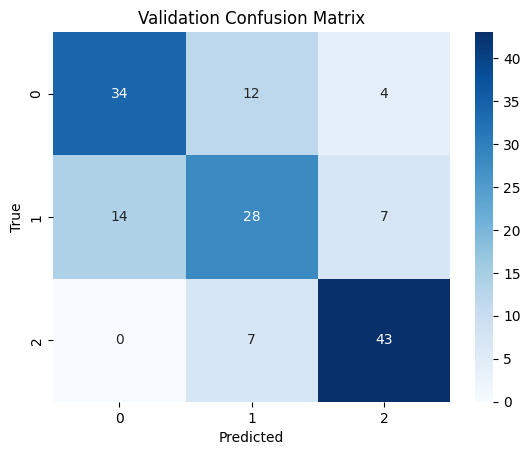


=== FINAL TEST EVALUATION ===

[Regression] Test metrics:
  MAE  (mg/kg): 0.1422
  RMSE (mg/kg): 0.2476
  R²          : 0.5591

[Classification] Test report:
              precision    recall  f1-score   support

           0       0.77      0.54      0.64        50
           1       0.57      0.72      0.64        50
           2       0.77      0.80      0.78        50

    accuracy                           0.69       150
   macro avg       0.70      0.69      0.69       150
weighted avg       0.70      0.69      0.69       150



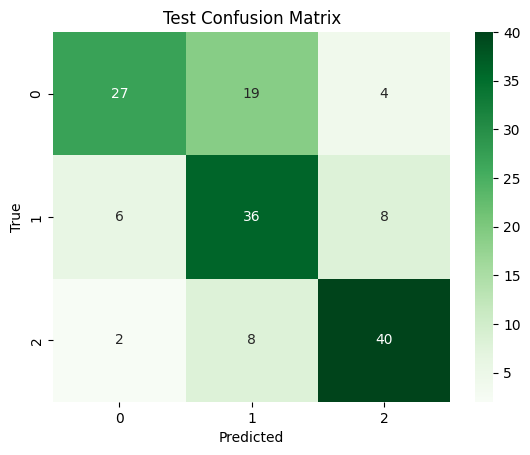


Species-level stats and ratios ready for interactive tool.


In [ ]:
!pip -q install ipywidgets

from google.colab import output
output.enable_custom_widget_manager()

import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    classification_report,
    confusion_matrix,
)

from IPython.display import display

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

DATA_PATH = "/content/fish_heavy_metals_master.csv"

df = pd.read_csv(DATA_PATH)
print("Raw data shape:", df.shape)
display(df.head())

df.columns = [c.strip().lower() for c in df.columns]
print("\nColumns:", df.columns.tolist())

production_map = {
    "atlantic salmon": "farmed",
    "coho salmon": "wild",
    "sockeye salmon": "wild",
    "salmon (generic)": "mixed",
    "pollock": "wild",
    "cod": "wild",
    "haddock": "wild",
    "whiting": "wild",
    "flounder": "wild",
    "sole": "wild",
    "plaice": "wild",
    "tilapia": "farmed",
    "catfish": "farmed",
    "trout": "mixed",
    "perch": "wild",
    "carp": "mixed",
    "walleye": "wild",
    "pike": "wild",
    "bluegill": "wild",
    "whitefish": "wild",
    "bass (freshwater)": "wild",
    "albacore tuna": "wild",
    "skipjack tuna": "wild",
    "bluefin tuna": "wild",
    "bigeye tuna": "wild",
    "yellowfin tuna": "wild",
    "mahi-mahi": "wild",
    "sea bass": "mixed",
    "snapper": "mixed",
    "grouper": "wild",
    "halibut": "wild",
    "sardine": "wild",
    "anchovy": "wild",
    "herring": "wild",
    "swordfish": "wild",
    "shark": "wild",
    "king mackerel": "wild",
    "tilefish (gulf)": "wild",
    "orange roughy": "wild",
    "marlin": "wild",
    "escolar": "wild",
    "opah": "wild",
    "shrimp": "mixed",
    "lobster (american)": "wild",
    "lobster (spiny)": "wild",
    "crab": "wild",
    "crayfish": "wild",
    "oyster": "wild",
    "mussel": "wild",
    "clam": "wild",
    "scallop": "wild",
    "squid": "wild",
    "octopus": "wild",
}

df["species_stripped"] = df["species"].str.lower().str.strip()
df["production"] = df["species_stripped"].map(production_map).fillna("wild")
df.drop(columns=["species_stripped"], inplace=True)

print("\nAdded 'production' column:")
display(df[["species", "production"]].head())

possible_metal_cols = {
    "mercury": ["mercury_mg_kg", "hg_mg_kg", "mercury", "total_mercury"],
    "lead":    ["lead_mg_kg", "pb_mg_kg", "lead"],
    "arsenic": ["arsenic_mg_kg", "as_mg_kg", "arsenic"],
    "cadmium": ["cadmium_mg_kg", "cd_mg_kg", "cadmium"],
}

def find_first_existing(col_candidates, df_cols):
    for c in col_candidates:
        if c in df_cols:
            return c
    return None

metal_cols = {}
for metal, candidates in possible_metal_cols.items():
    col = find_first_existing(candidates, df.columns)
    if col is not None:
        metal_cols[metal] = col

print("\nDetected metal columns:", metal_cols)
if not metal_cols:
    raise ValueError("No heavy metal columns detected. Adjust `possible_metal_cols` to match your CSV.")

metal_col_names = list(metal_cols.values())

for col in metal_col_names:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["has_any_metal"] = df[metal_col_names].notna().any(axis=1)
df = df[df["has_any_metal"]].copy().drop(columns=["has_any_metal"])
print("After dropping rows without any metal data:", df.shape)

potential_cat_features = ["species", "production", "location", "habitat", "diet"]
potential_num_features = ["length_cm", "weight_g"]

cat_features = [c for c in potential_cat_features if c in df.columns]
num_features = [c for c in potential_num_features if c in df.columns]

print("\nCategorical features:", cat_features)
print("Numeric features:    ", num_features)

df_target = df.copy()

Y_reg_all = df_target[metal_col_names].apply(lambda s: pd.to_numeric(s, errors="coerce"))
max_vals = Y_reg_all.max(axis=1)

s_num = pd.to_numeric(max_vals, errors="coerce")
valid_mask = s_num.notna()
s_num = s_num[valid_mask].astype(float)

df_target = df_target.loc[valid_mask].copy()
df_target["max_metal_value"] = s_num

print("\nmax_metal_value dtype:", df_target["max_metal_value"].dtype)

q1, q2 = s_num.quantile([1/3, 2/3])

df_target["risk_label"] = pd.cut(
    s_num,
    bins=[-np.inf, q1, q2, np.inf],
    labels=["low", "medium", "high"],
    include_lowest=True
)

risk_label_mapping = {"low": 0, "medium": 1, "high": 2}
df_target["risk_label_int"] = df_target["risk_label"].map(risk_label_mapping)

print("\nExample targets:")
display(df_target[["species", "production", "max_metal_value", "risk_label"]].head())

X = df_target[cat_features + num_features].copy()
y_reg = df_target["max_metal_value"].astype(float).copy()
y_cls = df_target["risk_label_int"].astype(int).copy()

num_feature_means = {c: float(df_target[c].mean()) for c in num_features}

def safe_train_test_split(X, y_reg, y_cls, test_size, random_state):
    unique_classes, counts = np.unique(y_cls, return_counts=True)
    can_stratify = (len(unique_classes) > 1) and (counts.min() >= 2)
    strat = y_cls if can_stratify else None
    return train_test_split(
        X, y_reg, y_cls,
        test_size=test_size,
        random_state=random_state,
        stratify=strat
    )

X_train_val, X_test, y_reg_train_val, y_reg_test, y_cls_train_val, y_cls_test = safe_train_test_split(
    X, y_reg, y_cls,
    test_size=0.15,
    random_state=RANDOM_STATE
)

X_train, X_val, y_reg_train, y_reg_val, y_cls_train, y_cls_val = safe_train_test_split(
    X_train_val, y_reg_train_val, y_cls_train_val,
    test_size=0.175,
    random_state=RANDOM_STATE
)

print("\nSplit sizes:")
print("  Train:", X_train.shape)
print("  Val:  ", X_val.shape)
print("  Test: ", X_test.shape)

transformers = []
if cat_features:
    transformers.append(("cat", OneHotEncoder(handle_unknown="ignore"), cat_features))
if num_features:
    transformers.append(("num", StandardScaler(), num_features))

preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder="drop"
)

regressor = RandomForestRegressor(
    n_estimators=300,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
regression_pipeline = Pipeline(
    steps=[("preprocess", preprocessor),
           ("model", regressor)]
)

print("\nTraining regression model (max metal concentration)...")
regression_pipeline.fit(X_train, y_reg_train)

y_reg_val_pred = regression_pipeline.predict(X_val)
mae_val = mean_absolute_error(y_reg_val, y_reg_val_pred)
mse_val = mean_squared_error(y_reg_val, y_reg_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_reg_val, y_reg_val_pred)

print("\n[Regression] Validation metrics:")
print(f"  MAE  (mg/kg): {mae_val:.4f}")
print(f"  RMSE (mg/kg): {rmse_val:.4f}")
print(f"  R²          : {r2_val:.4f}")

classifier = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=RANDOM_STATE,
    n_jobs=-1
)
classification_pipeline = Pipeline(
    steps=[("preprocess", preprocessor),
           ("model", classifier)]
)

print("\nTraining classification model (risk label low/medium/high)...")
classification_pipeline.fit(X_train, y_cls_train)

y_cls_val_pred = classification_pipeline.predict(X_val)
print("\n[Classification] Validation report:")
print(classification_report(
    y_cls_val, y_cls_val_pred,
    zero_division=0
))

classes_val = np.unique(np.concatenate([y_cls_val, y_cls_val_pred]))
cm_val = confusion_matrix(y_cls_val, y_cls_val_pred, labels=classes_val)
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("\n=== FINAL TEST EVALUATION ===")

y_reg_test_pred = regression_pipeline.predict(X_test)
mae_test = mean_absolute_error(y_reg_test, y_reg_test_pred)
mse_test = mean_squared_error(y_reg_test, y_reg_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_reg_test, y_reg_test_pred)

print("\n[Regression] Test metrics:")
print(f"  MAE  (mg/kg): {mae_test:.4f}")
print(f"  RMSE (mg/kg): {rmse_test:.4f}")
print(f"  R²          : {r2_test:.4f}")

y_cls_test_pred = classification_pipeline.predict(X_test)
print("\n[Classification] Test report:")
print(classification_report(
    y_cls_test, y_cls_test_pred,
    zero_division=0
))

classes_test = np.unique(np.concatenate([y_cls_test, y_cls_test_pred]))
cm_test = confusion_matrix(y_cls_test, y_cls_test_pred, labels=classes_test)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

species_stats = df_target.groupby("species")[metal_col_names + ["max_metal_value"]].mean()
species_stats = species_stats.reset_index().set_index("species")
for col in metal_col_names + ["max_metal_value"]:
    species_stats[col] = pd.to_numeric(species_stats[col], errors="coerce")

ratio_cols = {}
for metal, col in metal_cols.items():
    ratio_col = f"{col}_ratio_to_max"
    species_stats[ratio_col] = species_stats[col] / species_stats["max_metal_value"]
    species_stats[ratio_col] = species_stats[ratio_col].clip(lower=0, upper=1)
    ratio_cols[metal] = ratio_col

print("\nSpecies-level stats and ratios ready for interactive tool.")


# Interactive AI Decision Tool with Multi-Fish Comparison

In [ ]:
from ipywidgets import Dropdown, FloatText, Button, HBox, Output, Layout
from IPython.display import display, clear_output
import numpy as np
import pandas as pd

metal_col_names = list(metal_cols.values())

absorption_raw = {
    "mercury": 0.08,
    "arsenic": 0.95,
    "cadmium": 0.05,
    "lead": 0.10,
}

absorption_cooked = {
    "mercury": 0.92,
    "arsenic": 0.95,
    "cadmium": 0.05,
    "lead": 0.10,
}

def evaluate_fish_intake(
    species,
    production,
    preparation,
    amount_value,
    amount_unit="lb",
    body_weight_kg=80.0
):
    if amount_value is None or amount_value <= 0:
        amount_value = 0.5

    if amount_unit == "lb":
        mass_g = amount_value * 453.592
        unit_label = "lb"
        mass_to_unit = 1.0 / 453.592
    elif amount_unit == "kg":
        mass_g = amount_value * 1000.0
        unit_label = "kg"
        mass_to_unit = 1.0 / 1000.0
    else:
        mass_g = amount_value
        unit_label = "g"
        mass_to_unit = 1.0

    row_cat = {}
    for c in cat_features:
        if c == "species":
            row_cat[c] = str(species)
        elif c == "production":
            row_cat[c] = str(production)
        else:
            row_cat[c] = "Unknown"

    row_num = {}
    for c in num_features:
        row_num[c] = num_feature_means.get(c, 0.0)

    row = {**row_cat, **row_num}
    X_input = pd.DataFrame([row])

    pred_max_metal = float(regression_pipeline.predict(X_input)[0])

    metal_preds = {}
    if species in species_stats.index:
        stats_row = species_stats.loc[species]
        for metal, col in metal_cols.items():
            ratio_col = ratio_cols.get(metal)
            if (
                ratio_col in stats_row.index
                and not pd.isna(stats_row[ratio_col])
                and pred_max_metal > 0
            ):
                conc = stats_row[ratio_col] * pred_max_metal
            else:
                conc = stats_row[col] if col in stats_row.index else np.nan
            metal_preds[metal] = float(conc) if not pd.isna(conc) else np.nan
    else:
        metal_preds = {metal: float("nan") for metal in metal_cols}

    metal_intake_ug = {}
    for metal, conc in metal_preds.items():
        if pd.isna(conc):
            metal_intake_ug[metal] = np.nan
        else:
            metal_intake_ug[metal] = conc * mass_g

    absorption_map = absorption_raw if preparation == "raw" else absorption_cooked
    metal_absorbed_ug = {}
    for metal, intake in metal_intake_ug.items():
        if pd.isna(intake):
            metal_absorbed_ug[metal] = np.nan
        else:
            frac = absorption_map.get(metal, 1.0)
            metal_absorbed_ug[metal] = intake * frac

    TDI_UG_PER_KG_PER_DAY = 0.1
    weekly_tolerance = TDI_UG_PER_KG_PER_DAY * body_weight_kg * 7.0

    metal_ratios = {}
    for metal, absorbed in metal_absorbed_ug.items():
        if not pd.isna(absorbed) and weekly_tolerance > 0:
            metal_ratios[metal] = absorbed / weekly_tolerance

    if metal_ratios:
        limiting_metal = max(metal_ratios, key=metal_ratios.get)
        max_ratio = metal_ratios[limiting_metal]
    else:
        limiting_metal = None
        max_ratio = 0.0

    if max_ratio <= 1:
        safety = "SAFE"
    elif max_ratio <= 2:
        safety = "RISKY"
    else:
        safety = "DANGEROUS"

    margin_info = None
    if (
        limiting_metal is not None
        and limiting_metal in metal_preds
        and not pd.isna(metal_preds[limiting_metal])
        and weekly_tolerance > 0
    ):
        conc_lim = metal_preds[limiting_metal]
        frac_lim = absorption_map.get(limiting_metal, 1.0)
        if conc_lim > 0 and frac_lim > 0:
            mass_g_safe = weekly_tolerance / (conc_lim * frac_lim)
            mass_g_risky = 2.0 * weekly_tolerance / (conc_lim * frac_lim)

            mass_safe_unit = mass_g_safe * mass_to_unit
            mass_risky_unit = mass_g_risky * mass_to_unit
            current_unit = mass_g * mass_to_unit

            margin_info = {
                "limiting_metal": limiting_metal,
                "mass_safe_unit": mass_safe_unit,
                "mass_risky_unit": mass_risky_unit,
                "current_unit": current_unit,
                "unit_label": unit_label,
            }

    lines = []
    lines.append("======================================")
    lines.append(f"Species: {species} ({production}, {preparation})")
    lines.append(f"Amount per week: {amount_value:.2f} {amount_unit} (~{mass_g:.1f} g)")
    lines.append("--------------------------------------")

    if preparation == "raw" and production == "farmed":
        lines.append("⚠️ WARNING: Farmed seafood should NOT be consumed raw due to higher contamination and pathogen risks.")
        lines.append("⚠️ Choose WILD selections instead.")
        lines.append("--------------------------------------")

    lines.append(f"Model-predicted MAX metal (mg/kg): {pred_max_metal:.4f}")
    lines.append("")
    lines.append("Estimated per-metal absorption and intake:")

    for metal in metal_cols.keys():
        conc = metal_preds.get(metal, np.nan)
        total_intake = metal_intake_ug.get(metal, np.nan)
        absorbed = metal_absorbed_ug.get(metal, np.nan)
        frac = absorption_map.get(metal, 1.0)
        metal_name = metal.capitalize()
        if pd.isna(conc) or pd.isna(total_intake) or pd.isna(absorbed):
            lines.append(f"  {metal_name:8s} | conc: N/A    | absorbed: N/A | total: N/A")
        else:
            lines.append(
                f"  {metal_name:8s} | conc ≈ {conc:7.4f} mg/kg | absorbed ≈ {absorbed:8.1f} µg"
                f" ({frac*100:4.1f}% of {total_intake:8.1f} µg)"
            )

    lines.append("")
    lines.append("Overall safety classification (based on absorbed load):")
    lines.append(f"  >>> {safety} <<<")

    if margin_info is not None:
        lm = margin_info["limiting_metal"].capitalize()
        mass_safe = margin_info["mass_safe_unit"]
        mass_risky = margin_info["mass_risky_unit"]
        current = margin_info["current_unit"]
        unit_label = margin_info["unit_label"]

        lines.append("")
        lines.append("Margin to change classification (approx):")
        lines.append(f"  (Driven mostly by {lm})")

        if safety == "SAFE":
            add_to_risky = max(mass_risky - current, 0.0)
            add_to_safe_edge = max(mass_safe - current, 0.0)
            lines.append(f"  • Add ≈ {add_to_safe_edge:.2f} {unit_label} to reach SAFE/RISKY boundary.")
            lines.append(f"  • Add ≈ {add_to_risky:.2f} {unit_label} to reach RISKY/DANGEROUS boundary.")
        elif safety == "RISKY":
            remove_to_safe = max(current - mass_safe, 0.0)
            add_to_dangerous = max(mass_risky - current, 0.0)
            lines.append(f"  • Remove ≈ {remove_to_safe:.2f} {unit_label} for SAFE classification.")
            lines.append(f"  • Add ≈ {add_to_dangerous:.2f} {unit_label} for DANGEROUS classification.")
        else:
            remove_to_risky = max(current - mass_risky, 0.0)
            remove_to_safe = max(current - mass_safe, 0.0)
            lines.append(f"  • Remove ≈ {remove_to_risky:.2f} {unit_label} to drop to RISKY.")
            lines.append(f"  • Remove ≈ {remove_to_safe:.2f} {unit_label} to drop to SAFE.")

    lines.append("======================================")
    report = "\n".join(lines)

    return {
        "species": species,
        "production": production,
        "preparation": preparation,
        "amount_value": amount_value,
        "amount_unit": amount_unit,
        "mass_g": mass_g,
        "pred_max_metal_mg_kg": pred_max_metal,
        "metal_concentrations_mg_kg": metal_preds,
        "metal_intake_ug": metal_intake_ug,
        "metal_absorbed_ug": metal_absorbed_ug,
        "max_ratio_to_tolerance": max_ratio,
        "safety_class": safety,
        "report": report,
    }

species_options = sorted(df_target["species"].dropna().unique().tolist())

species_dd = Dropdown(
    options=species_options,
    description="Species:",
    value=species_options[0] if species_options else None,
    style={"description_width": "initial"},
    layout=Layout(width="250px"),
)

production_dd = Dropdown(
    options=["wild"],
    value="wild",
    description="Raised:",
    style={"description_width": "initial"},
    layout=Layout(width="150px"),
)

prep_dd = Dropdown(
    options=["raw", "cooked"],
    value="raw",
    description="Prep:",
    style={"description_width": "initial"},
    layout=Layout(width="140px"),
)

amount_ft = FloatText(
    value=0.5,
    description="Amount:",
    style={"description_width": "initial"},
    layout=Layout(width="200px"),
)

unit_dd = Dropdown(
    options=["lb", "kg", "g"],
    value="lb",
    description="Unit:",
    style={"description_width": "initial"},
    layout=Layout(width="120px"),
)

add_btn = Button(
    description="+",
    tooltip="Add this fish to comparison",
    layout=Layout(width="40px"),
)
clear_btn = Button(
    description="Clear",
    tooltip="Clear all comparisons",
    layout=Layout(width="70px"),
)

controls_box = HBox([species_dd, production_dd, prep_dd, amount_ft, unit_dd, add_btn, clear_btn])

out_detail = Output()
out_table = Output()
selected_results = []

species_production_options = {
    "atlantic salmon": ["farmed"],
    "coho salmon": ["wild"],
    "sockeye salmon": ["wild"],
    "salmon (generic)": ["wild", "farmed"],
    "tilapia": ["farmed"],
    "catfish": ["farmed"],
    "trout": ["wild", "farmed"],
    "pollock": ["wild"],
    "cod": ["wild"],
    "haddock": ["wild"],
    "whiting": ["wild"],
    "shrimp": ["wild", "farmed"],
    "sea bass": ["wild", "farmed"],
    "snapper": ["wild", "farmed"],
    "carp": ["wild", "farmed"],
}

def update_production_options(species):
    if species is None:
        production_dd.options = ["wild"]
        production_dd.value = "wild"
        production_dd.disabled = True
        return

    key = species.lower().strip()
    opts = species_production_options.get(key, [production_map.get(key, "wild")])

    if not isinstance(opts, (list, tuple)):
        opts = [opts]

    production_dd.options = opts
    production_dd.value = opts[0]
    production_dd.disabled = (len(opts) == 1)

def on_species_change(change):
    if change["name"] == "value" and change["new"] is not None:
        update_production_options(change["new"])

species_dd.observe(on_species_change, names="value")
update_production_options(species_dd.value)

def refresh_table():
    with out_table:
        clear_output(wait=True)
        if not selected_results:
            print("No fish added yet. Choose a species, raised type, prep, set an amount, then click '+'.")
            return

        rows = []
        for r in selected_results:
            absorbed = r["metal_absorbed_ug"]
            rows.append({
                "Species": r["species"],
                "Raised": r["production"],
                "Prep": r["preparation"],
                "Amount": f'{r["amount_value"]:.2f} {r["amount_unit"]}',
                "Hg_abs_ug": absorbed.get("mercury", np.nan),
                "Pb_abs_ug": absorbed.get("lead", np.nan),
                "As_abs_ug": absorbed.get("arsenic", np.nan),
                "Cd_abs_ug": absorbed.get("cadmium", np.nan),
                "Max_metal_mg_kg": r["pred_max_metal_mg_kg"],
                "Safety": r["safety_class"],
            })
        comp_df = pd.DataFrame(rows)
        print("=== Comparison Table (absorbed µg per week) ===")
        display(comp_df)

def on_add_clicked(b):
    if species_dd.value is None:
        return
    res = evaluate_fish_intake(
        species=species_dd.value,
        production=production_dd.value,
        preparation=prep_dd.value,
        amount_value=amount_ft.value,
        amount_unit=unit_dd.value,
        body_weight_kg=80.0,
    )
    selected_results.append(res)
    refresh_table()
    with out_detail:
        clear_output(wait=True)
        print(res["report"])

def on_clear_clicked(b):
    selected_results.clear()
    refresh_table()
    with out_detail:
        clear_output(wait=True)
        print("No fish selected yet.")

add_btn.on_click(on_add_clicked)
clear_btn.on_click(on_clear_clicked)

print("\nInteractive AI decision tool with multi-fish comparison (raw vs cooked, lb/kg/g, absorbed dose)")
display(controls_box, out_detail, out_table)
refresh_table()



Interactive AI decision tool with multi-fish comparison (raw vs cooked, lb/kg/g, absorbed dose)


Output()

Output()